### Carga de librerías

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=2063ade335be6d6263a7dfb8488ea128bd44a3b446b43a4df5c07e478b34fb41
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 24.6 MB/s eta 0:00:00


In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=fafd438e0b19a6a79523b35e9e047f151227e04cb117d824719a7bfa88404773
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
# for data
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# for processing
import re
import nltk
from nltk.tokenize import word_tokenize
import string
import emoji
import contractions 

# for ML
from sklearn import feature_extraction, feature_selection, model_selection, naive_bayes, pipeline, manifold, preprocessing, metrics, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, cross_validate, RepeatedStratifiedKFold, train_test_split
from sklearn.utils import class_weight
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# for explainer
from lime import lime_text

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

### Carga de datos

Importamos los datos desde un archivo csv a un DataFrame de Pandas. En este caso, tengo los archivos en mi Google Drive en una carpeta llamada csv_files. Si no quiere montar el Drive, pueden subir el archivo como lo hicieron en las sesiones pasadas. Solo borren o comenten la celda donde se monta le discor y cambien la dirección del archivo en `pd.read_csv('<nombre-del-archivo>')`.

Para esta práctica vamos a usar el conjunto de datos Disaster Tweets, el cual se encuentra dispoible en [Kaggle](https://www.kaggle.com/competitions/nlp-getting-started).

In [ ]:
df = pd.read_csv('train.csv')

Renombramos los encabezados para no escribir tanto en el futuro y seguir una nomenclatura aceptada dentro del área de ML.

In [ ]:
df = df.rename(columns={"target":"y", "text":"text"})

Mandamos a imprimir 5 filas de forma aleatoria para observar los datos.

In [ ]:
df.sample(5)

,id,keyword,location,text,y
395,570,arson,"Eldoret, kenya",#Kisii Police in Kisii hunt for students over ...,1
4777,6796,lightning,"Waverly, IA",'When you walk away\nNothing more to say\nSee ...,0
4588,6525,injuries,Toronto,All injuries Pre Foster/Floyd. Those will be c...,0
571,826,battle,Australia,#LonePine remembered around Australia as 'desc...,0
6761,9687,tornado,NaN,Heather Night and Ava Sparxxx enjoy a wild tee...,0


Vamos a explorar brevemente la distribución de los datos según su clase por medio de un gráfico de barras horizontales.

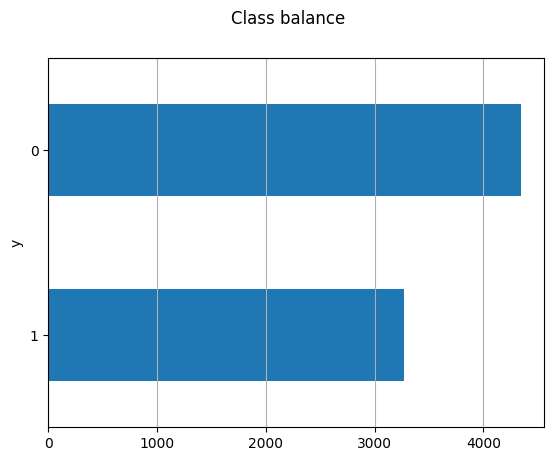

In [ ]:
fig, ax = plt.subplots()
fig.suptitle("Class balance", fontsize=12)
df["y"].reset_index().groupby("y").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

### Procesamiento de texto

A continuación, vamos a realizar una función para procesar el texto: limpieza, remover stopwords, y normalizar mediante lematización o stemming. Esta función se puede mapear en un DataFrame y esta forma, procesar toda una columna de texto. En este caso, añadí la propuesta hecha en el curso de procesamiento en la función `my_preprocess_text`.

Nota: por el momento, solo es posible lematizar documentos en inglés. Para trabajar con documentos en español, es necesario realizar stemming. Para activar el proceso de lematización o stemming, cambien el valor de las banderas de `True` a `False`, respectivamente.

In [ ]:
def get_wordnet_pos(treebank_tag):

	if treebank_tag.startswith('J'):
		return nltk.corpus.wordnet.ADJ
	elif treebank_tag.startswith('V'):
		return nltk.corpus.wordnet.VERB
	elif treebank_tag.startswith('N'):
		return nltk.corpus.wordnet.NOUN
	elif treebank_tag.startswith('R'):
		return nltk.corpus.wordnet.ADV
	else:
		return nltk.corpus.wordnet.NOUN

In [ ]:
def my_preprocess_text(text, flg_stemm=True, flg_lemm=False, lst_stopwords=None, flg_contractions = False):

  # quitamos hashtags
  # clean_tweet = re.sub('#[A-Za-z0-9_]+', '', text)

  # quitamos cashtags
  clean_tweet = re.sub('\$[A-Za-z0-9_]+', '', text)

  # quitamos nombres de usuario
  clean_tweet = re.sub('@[A-Za-z0-9_]+', '', clean_tweet)

  # sustituimos emojis por su traduccion al idioma objetivo
  clean_tweet = emoji.demojize(clean_tweet, language = 'en')

  # quitamos enlaces
  clean_tweet = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', clean_tweet)

  # quitamos signos de puntuacion
  clean_tweet = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', clean_tweet)

  # quitamos numeros
  clean_tweet = re.sub('[0-9_]+', '', clean_tweet)

  # quitar caracteres repetidos
  clean_tweet = re.sub(r'(.)\1{2,}', r'\1', clean_tweet)

  # quitamos contracciones (solo para el ingles)
  if (flg_contractions == True):
    clean_tweet = contractions.fix(clean_tweet)

  # tokenizamos
  clean_tweet = word_tokenize(clean_tweet)

  # filtramos palabras vacias
  if (lst_stopwords is not None):
    clean_tweet = [word for word in clean_tweet if word not in lst_stopwords]
  
  # Stemming 
  if (flg_stemm == True):
    ps = nltk.stem.porter.PorterStemmer()
    clean_tweet = [ps.stem(word) for word in clean_tweet]
                
  # Lematizacion
  if flg_lemm == True:
    wnl = nltk.stem.wordnet.WordNetLemmatizer()
    tags = nltk.pos_tag(clean_tweet)
    clean_tweet = [wnl.lemmatize(j[0],get_wordnet_pos(j[1])) for j in tags]
            
  # volvemos a jutar las palabras en una oracion
  text = " ".join(clean_tweet).lower()
  return text

Aplicamos nuestra función para procesar el texto en el corpus dentro del DataFrame.

In [ ]:
df["text_clean"] = df["text"].apply(lambda x: my_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
                                                                      lst_stopwords=nltk.corpus.stopwords.words("english"), flg_contractions = True))

In [ ]:
df.head()

,id,keyword,location,text,y,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all resident ask shelter place notify officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just get sent photo ruby alaska smoke wildfire...


### Preparación de los datos para el modelo de ML

Empezamos con las bases para entrenar los modelos. Primero, realizamos la partición del conjunto de datos en conjuntos de entrenamiento y prueba. Para obtener los valores de `y` debemos extraerlos mediante `values`. 

In [ ]:
# split train-test
df_train, df_test = train_test_split(df, test_size=0.25)

### Clasificador

In [ ]:
def set_feature_extraction(method = 'bow', ngram = 2):
  # regresa el metodo para vectorizar el texto: Bag-of-Words y TF-IDF con ngramas (1-2) o (1-3)
  if (method=='bow'):
    return feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,ngram))
  elif (method == 'tfidf'):
    return feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,ngram))

In [ ]:
def chi2_dim_reduction(df, y, method = 'tfidf', n = 2):

  # extraemos el texto limpio para reducirlo via chi2
  corpus = df["text_clean"]

  # se transforma segun tfidf
  vectorizer = set_feature_extraction(method = 'tfidf', ngram = n)

  vectorizer.fit(corpus) # realizamos la vectorizacion (bow con tfidf)
  X = vectorizer.transform(corpus) #transformamos el conjunto de entrenamiento
  dic_vocabulary = vectorizer.vocabulary_ # determinamos cual es nuestro vocabulario final

  # reduccion de dimensionalidad via prueba chi2

  X_names = vectorizer.get_feature_names_out()
  p_value_limit = 0.95

  # creamos un dataframe nuevo para albergar las palabras que pasa la prueba
  df_features = pd.DataFrame()

  for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X, y==cat) 
    df_features = df_features.append(pd.DataFrame(
                     {"feature":X_names, "score":1-p, "y":cat})) 
    df_features = df_features.sort_values(["y","score"], 
                      ascending=[True,False])
    df_features = df_features[df_features["score"]>p_value_limit]
    
  X_names = df_features["feature"].unique().tolist()

  # se crea un nuevo vectorizer utilizando el nuevo vocabulario reducido
  red_vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
  red_vectorizer.fit(corpus)
  X = red_vectorizer.transform(corpus) 
  dic_vocabulary = red_vectorizer.vocabulary_

  return red_vectorizer

In [ ]:
def grid_search_clf(df, C=None, gamma = None, search_delta=0.25):

  # extraemos los valores 'y' para clasificar del dataframe que alberga los datos
  y = df['y'].values

  # reduccion de dimensionalidad via chi2
  vectorizer = chi2_dim_reduction(df, y, n=3)
  # vectorizer = set_feature_extraction(method = 'tfidf', ngram=3)

  # parametros de la malla de busqueda
  clf = svm.SVC(class_weight='balanced', probability=False)

  # pipeline --- Update 04/07/22: new pipeline including tipologies count for each tweet/header
  text_features = ColumnTransformer([("vectorizer", vectorizer, 'text_clean')])
  model = pipeline.Pipeline([("features", text_features),  ("classifier", clf)])

  if (C is None):
    # Parametros de la malla: ojo con la definicion ->  classifier__ // dos guiones bajos antes del parametro
    grid_params = {}
    grid_params['classifier__kernel'] = ['rbf']
    grid_params['classifier__C'] = [2**k for k in range(-5,16)] 
    grid_params['classifier__gamma'] = [2**k for k in range(-15, 4)]
  else:
    grid_params = {}
    grid_params['classifier__kernel'] = ['rbf']
    grid_params['classifier__C'] = [2**(C+(k*search_delta)) for k in range(-8,8)] # np.arange(0.1,4.1,0.1) 
    grid_params['classifier__gamma'] = [2**(gamma+(k*search_delta)) for k in range(-8,8)] #[2**(-7+(0.25*k)) for k in range(-8,8)] # np.arange(0.1,4.1,0.1)

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
  grid_search = GridSearchCV(model, param_grid=grid_params, n_jobs=-1, cv=cv, scoring='balanced_accuracy')
  grid_result = grid_search.fit(df, y) # fit(X,y)
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  print('Best: %f, %f'% (grid_result.cv_results_['mean_test_score'][grid_result.best_index_], grid_result.cv_results_['std_test_score'][grid_result.best_index_]))
  # means = grid_result.cv_results_['mean_test_score']
  # stds = grid_result.cv_results_['std_test_score']
  # params = grid_result.cv_results_['params']

  #for mean, stdev, param in zip(means, stds, params):
  #    print("%f (%f) with: %r" % (mean, stdev, param))
  return grid_result.best_score_,grid_result.best_params_

In [ ]:
def clf_data_svm(df, k_C, k_gamma, df_val = None):

  y = df['y'].values
  # comenzamos con el modelo de clasificacion
  vectorizer = chi2_dim_reduction(df_train, y, n=3) # atentos con el valor de n y el vectorizer

  clf = svm.SVC(kernel = 'rbf', C = 2.0**k_C, gamma = 2.0**k_gamma, class_weight='balanced')

  # fit sin validacion cruzada

  text_features = ColumnTransformer([("vectorizer", vectorizer, 'text_clean')])
  model = pipeline.Pipeline([("features", text_features),  ("classifier", clf)])

  # entrenar y ajustar el clasificador con validacion cruzada

  scores = cross_val_score(model, df, y, cv=10, n_jobs = -1)
  predicted = cross_val_predict(model, df, y, cv=10, n_jobs=-1)

  clf_evaluation(y, predicted)

In [ ]:
def plot2_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
	"""
	This function prints and plots the confusion matrix.
	Normalization can be applied by setting `normalize=True`.
	"""
	if normalize:
		cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
		print("Normalized confusion matrix")
	else:
		print('Confusion matrix, without normalization')

	print(cm)

	plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
	plt.title(title)
	plt.colorbar()
	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation=45)
	plt.yticks(tick_marks, classes)

	fmt = '.1f' if normalize else 'd'
	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
	
	#plt.tight_layout()
	plt.ylabel('Clase correcta')
	plt.xlabel('Clase predicha')

In [ ]:
def clf_evaluation(y_test, predicted):

	"""

	Finalmente, vamos a evaluar el desempeño de nuestro clasificador. Calculamos las métricas básicas:

	* Accuracy
	* Precision
	* Recall
	* F1

	Además, determinamos nuestra matriz de confusión.

	"""
	classes = np.unique(y_test)

	# Accuracy, Precision, Recall
	balanced_accuracy_score = metrics.balanced_accuracy_score(y_test, predicted)
	accuracy_score = metrics.accuracy_score(y_test, predicted)
	f1_score = metrics.f1_score(y_test, predicted)
	print("Balanced accuracy score:", balanced_accuracy_score)
	print("Accuracy score:", accuracy_score)
	print("F1 score:", accuracy_score)
	print("Details:")
	print(metrics.classification_report(y_test, predicted))
    
	# Plot confusion matrix
	cfn = metrics.confusion_matrix(y_test, predicted)
	plt.figure()
	plot2_confusion_matrix(cfn, classes=[-1,1], title=('Matriz de Confusión'))
	plt.figure()
	plot2_confusion_matrix(cfn, classes=[-1,1], normalize=True, title=('Matriz de Confusión Normalizada'))
	plt.show()

## Main

In [ ]:
# Empezamos el proceso de clasificación
print('Learning from data...')
k = 1
print('Iteration #'+str(k))
prev = 0.0
tol = 0.0001
search_delta = 0.25
best_result, best_params = grid_search_clf(df_test)

while (best_result-prev>tol):
  prev = best_result
  best_result, best_params = grid_search_clf(df, C = np.log2(best_params['classifier__C']), gamma = np.log2(best_params['classifier__gamma']), search_delta = search_delta)
  search_delta /= 2
  k += 1
  print('Iteration #'+str(k))
  
clf_data_svm(df)

Learning from data...
Iteration #1


<ipython-input-27-430a185c3cfd>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(
<ipython-input-27-430a185c3cfd>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(


Best: 0.638075 using {'classifier__C': 0.125, 'classifier__gamma': 0.5, 'classifier__kernel': 'rbf'}
Best: 0.638075, 0.028351


<ipython-input-27-430a185c3cfd>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(
<ipython-input-27-430a185c3cfd>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(


Best: 0.777683 using {'classifier__C': 0.3535533905932738, 'classifier__gamma': 1.4142135623730951, 'classifier__kernel': 'rbf'}
Best: 0.777683, 0.008998
Iteration #2


<ipython-input-27-430a185c3cfd>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(
<ipython-input-27-430a185c3cfd>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_features = df_features.append(pd.DataFrame(
